In [1]:
import scipy.spatial.distance

"""Some important Ptolemaic metric spaces are 4-embeddable into R^3.
Connor mentions a tetrahedron lower bound: When all but one distances
between four points are known, the last one can be lower bounded as the
shortest side of a tetrahedron. This would be a degenerate tetrahedron,
with the two known triangles sharing one side and lying in the same plane.
"""

'Some important Ptolemaic metric spaces are 4-embeddable into R^3.\nConnor mentions a tetrahedron lower bound: When all but one distances\nbetween four points are known, the last one can be lower bounded as the\nshortest side of a tetrahedron. This would be a degenerate tetrahedron,\nwith the two known triangles sharing one side and lying in the same plane.\n'

In [7]:
import numpy as np
from sympy import *
#from algebra_with_sympy import *

init_printing(use_latex='mathjax')

dist_prop = dict(real=True, positive=True)
# generic symbols
A, s, a, b, c, h = symbols("A s a b c h", **dist_prop)

# Heron
semiperimeter = {s: (a + b + c) / 2}
area = sqrt(s * (s - a) * (s - b) * (s - c))

height_over_a = 2 / a * area.subs(semiperimeter)

area, semiperimeter

⎛     ____________________________  ⎧   a   b   c⎫⎞
⎜√s⋅╲╱ (-a + s)⋅(-b + s)⋅(-c + s) , ⎨s: ─ + ─ + ─⎬⎟
⎝                                   ⎩   2   2   2⎭⎠

![](img.png)

In [22]:
# we have two pivots, a query (center) and an object
# we want to lower bound d(q,o)
# we know all other distances

# the two resulting triangles have a shared base p0-p1 of length p
p = symbols("p", **dist_prop)

# the query triangle has these other sides:
q_0, q_1 = symbols("q:2", **dist_prop)

# dito for the object triangle
o_0, o_1 = symbols("o:2", **dist_prop)

# these triangles have heights that we can infer via Heron
h_q = height_over_a.subs({
    a: p, b: q_0, c: q_1
})
h_o = height_over_a.subs({
    a: p, b: o_0, c: o_1
})

def simplify_height(h):
    h = simplify(h)
    h = h.subs(h.args[2],
                   (h.args[2]).factor()
               )
    return h

# both formulas are the same!
assert simplify(h_o.subs({o_1:q_1,o_0:q_0}) == h_q)

h_q = simplify_height(h_q)
h_o = simplify_height(h_o)
h_q

  ____________________________________________   _____________
╲╱ -(p - q₀ - q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ 
──────────────────────────────────────────────────────────────
                             2⋅p                              

In [5]:
# the height "bisects" the shared base at these lengths,
# measured from one of the two possible vertices:
m_q0 = sqrt(q_0**2 - h_q**2)
m_o0 = sqrt(o_0**2 - h_o**2)

m_q1 = sqrt(q_1**2 - h_q**2)
m_o1 = sqrt(o_1**2 - h_o**2)

m_q0, m_o0

⎛     _______________________________________________________________       __________________________
⎜    ╱   2   (p - q₀ - q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁)⋅(p + q₀ + q₁)       ╱   2   (-o₀ - o₁ + p)⋅(-o₀
⎜   ╱  q₀  + ─────────────────────────────────────────────────────── ,    ╱  o₀  + ───────────────────
⎜  ╱                                      2                              ╱                            
⎝╲╱                                    4⋅p                             ╲╱                             

_______________________________________⎞
 + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ + p) ⎟
────────────────────────────────────── ⎟
           2                           ⎟
        4⋅p                            ⎠

In [6]:
# We know the height of the triangle w.r.t. q.
# Let's figure out the "width" or the "x-position" of the point q.

# Let q_0 be on the left and q_1 be on the right.
# If the triangle is acute:
m_ac = m_q0

# If the triangle is obtuse, we have two cases:
# One where the point is to the left:
m_ob_left = -m_q0
# And one where the point is to the right:
m_ob_right = m_q0 # which is identical to m_ac

# left obtuse means that q_1 has to be the longest side and
# that q_1**2 > p**2 + q_1**2
m_q = Piecewise(
    (m_ob_left,  q_1**2 > p**2 + q_0**2), # And(And(q_1 > p, q_1 > q_0) ,
    (m_ac, True)
)

m_o = m_q.subs({m_q0:m_o0, q_0:o_0, q_1:o_1})
m_o

⎧      _________________________________________________________________                    
⎪     ╱   2   (-o₀ - o₁ + p)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ + p)         2     2    2
⎪-   ╱  o₀  + ─────────────────────────────────────────────────────────   for o₁  > o₀  + p 
⎪   ╱                                       2                                               
⎪ ╲╱                                     4⋅p                                                
⎨                                                                                           
⎪     _________________________________________________________________                     
⎪    ╱   2   (-o₀ - o₁ + p)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ + p)                      
⎪   ╱  o₀  + ─────────────────────────────────────────────────────────        otherwise     
⎪  ╱                                       2                                                
⎩╲╱                                     4⋅p                           

In [30]:
printing.print_python(m_o)

o0 = Symbol('o0')
o1 = Symbol('o1')
p = Symbol('p')
e = Piecewise((-sqrt(o0**2 + (-o0 - o1 + p)*(-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 + p)/(4*p**2)), o1**2 > o0**2 + p**2), (sqrt(o0**2 + (-o0 - o1 + p)*(-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 + p)/(4*p**2)), true))


In [111]:
simplify((-m_q + m_o)**2)

⎧                                                                             
⎪⎛   _____________________________________________________________________    
⎪⎜  ╱     2  2                                                                
⎪⎝╲╱  4⋅o₀ ⋅p  - (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p)⋅(o₀ + o₁ + p)  - ╲
⎪─────────────────────────────────────────────────────────────────────────────
⎪                                                                            2
⎪                                                                         4⋅p 
⎪                                                                             
⎪                                                                             
⎪⎛   _____________________________________________________________________    
⎪⎜  ╱     2  2                                                                
⎨⎝╲╱  4⋅o₀ ⋅p  - (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p)⋅(o₀ + o₁ + p)  + ╲
⎪───────────────────────────────────────────────────

In [124]:
# construct the right triangle which hypotenuse of length d connects q and o
# from h and m s

dist = (h_q - h_o) ** 2 + (m_q - m_o) ** 2 # = d**2
dist = sqrt(dist)
simplify(dist).args[0]

⎛     ________________________________________________________________________
⎜    ╱                                                                        
⎜   ╱                                                                         
⎜  ╱   ⎛  ____________________________________________   _____________     ___
⎜╲╱    ⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  - ╲╱ (-
⎜─────────────────────────────────────────────────────────────────────────────
⎝                                                                             

______________________________________________________________________________
                                                                              
                                                          2   ⎛   ____________
_________________________________________   _____________⎞    ⎜  ╱     2  2   
p + q₀ + q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝╲╱  4⋅o₀ ⋅p  - 
───────────────────────────────────────────────────

In [123]:
term, condition = simplify(dist).args[0]
term

                                                                              
                                                                              
⎛  ____________________________________________   _____________     __________
⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  - ╲╱ (-p + q₀ 
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

                                                                              
                                                   2   ⎛   ___________________
__________________________________   _____________⎞    ⎜  ╱     2  2          
+ q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝╲╱  4⋅o₀ ⋅p  - (-o₀ + 
──────────────────────────────────────────────────────────────────────────────
                                                   

In [115]:
dist.args

⎛                                                                             
⎜⎛  ⎛⎧      _________________________________________________________________ 
⎜⎜  ⎜⎪     ╱   2   (-o₀ - o₁ + p)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ + p)  
⎜⎜  ⎜⎪-   ╱  o₀  + ─────────────────────────────────────────────────────────  
⎜⎜  ⎜⎪   ╱                                       2                            
⎜⎜  ⎜⎪ ╲╱                                     4⋅p                             
⎜⎜- ⎜⎨                                                                        
⎜⎜  ⎜⎪     _________________________________________________________________  
⎜⎜  ⎜⎪    ╱   2   (-o₀ - o₁ + p)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ + p)   
⎜⎜  ⎜⎪   ╱  o₀  + ─────────────────────────────────────────────────────────   
⎜⎜  ⎜⎪  ╱                                       2                             
⎝⎝  ⎝⎩╲╱                                     4⋅p                              

                                                   

In [132]:
# we can also find an upper bound this way:
# arrange the triangles so that one height is positive and one is negative:
dist_ub = (h_q + h_o)**2 + (m_q - m_o)**2
dist_ub = sqrt(dist_ub)
dist_ub

             _________________________________________________________________
            ╱                                                                 
           ╱                                                                  
          ╱                                                                   
         ╱                                                                    
        ╱     ⎛  ______________________________________________   ____________
       ╱      ⎜╲╱ -(-o₀ - o₁ + p)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p) ⋅╲╱ o₀ + o₁ + p
      ╱       ⎜───────────────────────────────────────────────────────────────
     ╱        ⎝                              2⋅p                              
    ╱                                                                         
   ╱                                                                          
  ╱                                                                           
╲╱                                                  

In [133]:

# geometrically, we know that
# m_q0 + m_o0 == m_o1 + m_q1


In [134]:
# test with a simple triangle:
tri0 = {
    p:3,
    q_0:7,
    q_1:5,
}
tri1 = {
    p:tri0[p],
    o_0:10.77,
    o_1:12.21,
}

height0 = 4.33
m_base0 = 5.5
precision = 0.02

assert N(abs(h_q.subs(tri0) - height0)) < precision, "wrong height!"
assert N(abs(m_q0.subs(tri0) - m_base0)) < precision, "wrong intersect!"

dist_n = float(dist.subs(tri0).subs(tri1))
assert np.allclose(dist_n, 11.06, atol=precision), dist_n

In [135]:
# test with a "hard" triangle
trih = {
    p:32.44996148,
    q_0:65.76473219,
    q_1:38.83297568,
    o_0:64.5368112 ,
    o_1:36.22154055,
}

assert np.abs(h_q.subs(trih) - 27.74) < precision
assert np.abs(h_o.subs(trih) - 23.3) < precision
m_q0.subs(trih) - 32.45, m_o0.subs(trih) - 32.45

assert np.allclose(float(dist.subs(trih)), 4.47, atol=precision)

In [136]:
# from Connor's paper:
# 1/d(p0,p1) * (d(q, p0)**2 + d(q, p0)**2) > 2*t
# is a lower bound
lb = 1/2/p * (q_0**2 + q_1**2)
N(lb.subs(tri0)), N(dist_n)

(12.3333333333333, 11.0730938046379)

In [137]:
simplify(dist < lb)


             _________________________________________________________________
            ╱                                                                 
           ╱                                                                  
          ╱                                                                   
         ╱                                                                    
        ╱     ⎛    ______________________________________________   __________
       ╱      ⎜  ╲╱ -(-o₀ - o₁ + p)⋅(-o₀ + o₁ + p)⋅(o₀ - o₁ + p) ⋅╲╱ o₀ + o₁ +
      ╱       ⎜- ─────────────────────────────────────────────────────────────
     ╱        ⎝                                2⋅p                            
    ╱                                                                         
   ╱                                                                          
  ╱                                                                           
╲╱                                                  

In [138]:
nsolveset(dist - 3,o_0, domain=S.Reals)

NameError: name 'nsolveset' is not defined

In [139]:
printing.print_python(dist_ub)

o0 = Symbol('o0')
o1 = Symbol('o1')
p = Symbol('p')
q0 = Symbol('q0')
q1 = Symbol('q1')
e = sqrt((sqrt(-(-o0 - o1 + p)*(-o0 + o1 + p)*(o0 - o1 + p))*sqrt(o0 + o1 + p)/(2*p) + sqrt(-(p - q0 - q1)*(p - q0 + q1)*(p + q0 - q1))*sqrt(p + q0 + q1)/(2*p))**2 + (-Piecewise((-sqrt(o0**2 + (-o0 - o1 + p)*(-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 + p)/(4*p**2)), o1**2 > o0**2 + p**2), (sqrt(o0**2 + (-o0 - o1 + p)*(-o0 + o1 + p)*(o0 - o1 + p)*(o0 + o1 + p)/(4*p**2)), true)) + Piecewise((-sqrt(q0**2 + (p - q0 - q1)*(p - q0 + q1)*(p + q0 - q1)*(p + q0 + q1)/(4*p**2)), q1**2 > p**2 + q0**2), (sqrt(q0**2 + (p - q0 - q1)*(p - q0 + q1)*(p + q0 - q1)*(p + q0 + q1)/(4*p**2)), true)))**2)


In [141]:
connor_diff = lambdify([p,q_0, q_1, o_0, o_1], lb - dist, "numpy")
tetrahedron_lb = lambdify([p,q_0, q_1, o_0, o_1], dist, "numpy")
tetrahedron_ub = lambdify([p,q_0, q_1, o_0, o_1], dist_ub, "numpy")

def ptolemy_lb(p, q_0, q_1, o_0, o_1):
    diff = np.abs(q_0 * o_1 - q_1 * o_0)
    return diff / p

In [142]:
from tqdm import tqdm

def _stable_tetrahedron_lb(p_n, q_0_n, q_1_n, o_0_n, o_1_n):
    for i in tqdm(range(len(p_n))):
        yield dist.subs({
            p:p_n[i],
            q_0:q_0_n[i],
            q_1:q_1_n[i],
            o_0:o_0_n[i],
            o_1:o_1_n[i],
        }).evalf()

def stable_tetrahedron_lb(p_n, q_0_n, q_1_n, o_0_n, o_1_n):
    return np.asarray(list(_stable_tetrahedron_lb(p_n, q_0_n, q_1_n, o_0_n, o_1_n)), dtype=float)

In [154]:
points[:,p0,:].shape

(100000, 6)

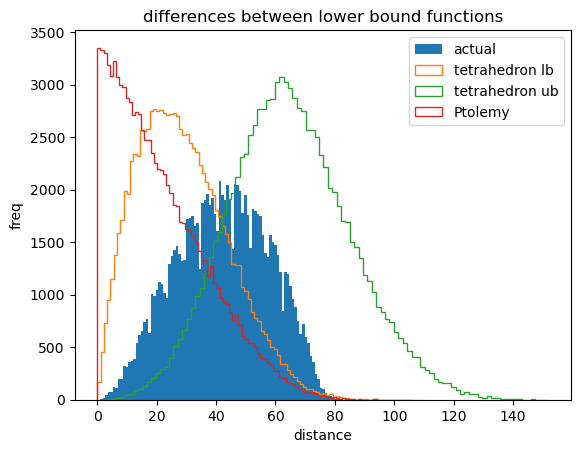

In [166]:
# simulate triangles
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
rng = np.random.default_rng()

dist_func = lambda x,y: spatial.minkowski_distance(x,y,5)# np.linalg.norm(x-y, axis=-1)
n_samples= 100000
dim = 3
points = rng.integers(-37,38, size=[n_samples, 4, dim])
p0,p1,q,o = 0,1,2,3
dists_p = dist_func(points[:,p0,:], points[:,p1,:])
dists_q0 = dist_func(points[:,p0,:], points[:,q,:])
dists_q1 = dist_func(points[:,p1,:], points[:,q,:])
dists_o0 = dist_func(points[:,p0,:], points[:,o,:])
dists_o1 = dist_func(points[:,p1,:], points[:,o,:])
dists_target = dist_func(points[:,q,:], points[:,o,:])

args = np.vstack((dists_p, dists_q0, dists_q1, dists_o0, dists_o1))
tet_lb = tetrahedron_lb(*args)
tet_ub = tetrahedron_ub(*args)
pto_n = ptolemy_lb(*args)
connors_lb_n = connor_lb(*args)
connors_lb_n = np.clip(connors_lb_n, -10, 200)

bins = 100
plt.hist(dists_target,  bins=bins, label="actual")
plt.hist(tet_lb, bins=bins, histtype="step", label="tetrahedron lb")
plt.hist(tet_ub, bins=bins, histtype="step", label="tetrahedron ub")
plt.hist(pto_n, bins=bins, histtype="step", label="Ptolemy")
#plt.hist(connors_lb_n, bins=bins, histtype="step", label="connor")

plt.title("differences between lower bound functions")
plt.xlabel("distance")
plt.ylabel("freq")
plt.legend()
plt.show()

In [167]:
def violations(lb):
    return (dists_target < lb).sum() / len(dists_target)
violations_tet = violations(tet_lb)
violations_pto = violations(pto_n)
violations_tet, violations_pto

(0.15961, 0.07072)

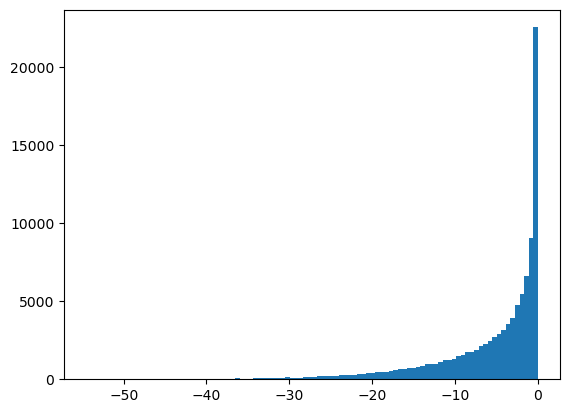

In [159]:
plt.hist(pto_n - tet_lb, bins=100);

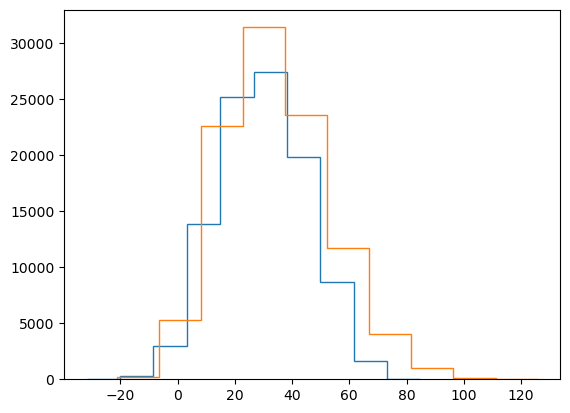

In [160]:
plt.hist(dists_target - tet_lb, histtype="step");
plt.hist(tet_ub - dists_target, histtype="step");

In [18]:
problems = np.abs(dists_target - my_lb_n) > 0.01
ppoints = points[problems,:,:]

plt.plot(*ppoints[0][:2].T)
for p in ppoints[0]:
    plt.plot(*p, "o")
    
plt.show()

NameError: name 'my_lb_n' is not defined